In [34]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [12]:
# Ignore warnings for better readability
import warnings
warnings.filterwarnings("ignore")

In [17]:
# Load the Mushroom Dataset
df = pd.read_csv('mushroom.csv')

In [18]:
columns = [
    "class", "cap-shape", "cap-surface", "cap-color", "bruises", "odor",
    "gill-attachment", "gill-spacing", "gill-size", "gill-color", "stalk-shape",
    "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring",
    "stalk-color-above-ring", "stalk-color-below-ring", "veil-type", "veil-color",
    "ring-number", "ring-type", "spore-print-color", "population", "habitat"
]

In [19]:
# Display first few rows
print("\nDataset Preview:")
print(df.head())


Dataset Preview:
   Unnamed: 0 cap_shape cap_surface cap_color bruises   odor gill_attachment  \
0        1167    sunken       scaly     white      no  anise      descending   
1        1037    sunken     fibrous       red      no  anise         notched   
2         309      flat     grooves    purple     yes   foul      descending   
3         282      bell       scaly      pink     yes  fishy         notched   
4         820      flat      smooth    yellow     yes  musty            free   

  gill_spacing gill_size gill_color  ...  veil_type veil_color ring_number  \
0      distant     broad       pink  ...    partial      brown         two   
1      crowded    narrow  chocolate  ...  universal      brown         two   
2      crowded     broad     purple  ...  universal     yellow         two   
3        close     broad     orange  ...    partial     yellow         two   
4      crowded    narrow     orange  ...  universal      white        none   

   ring_type spore_print_color p

In [20]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64


In [21]:
# Display dataset info
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object

In [22]:
# Unique values in each column
print("\nUnique Values Per Column:")
print(df.nunique())


Unique Values Per Column:
Unnamed: 0                  976
cap_shape                     5
cap_surface                   4
cap_color                     9
bruises                       2
odor                          9
gill_attachment               4
gill_spacing                  3
gill_size                     2
gill_color                   12
stalk_shape                   2
stalk_root                    7
stalk_surface_above_ring      4
stalk_surface_below_ring      4
stalk_color_above_ring        9
stalk_color_below_ring        9
veil_type                     2
veil_color                    4
ring_number                   3
ring_type                     8
spore_print_color             9
population                    6
habitat                       7
class                         2
stalk_height                973
cap_diameter                976
dtype: int64


In [24]:
# Task 2: Data Preprocessing

# Encode categorical variables
encoder = LabelEncoder()
for col in df.columns:
    df[col] = encoder.fit_transform(df[col])

# Splitting dataset into features (X) and target variable (y)
X = df.drop(columns=["class"])  # Features
y = df["class"]  # Target variable

# Splitting data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining and Testing Set Sizes:")
print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")


Training and Testing Set Sizes:
Training set: (1600, 25), Testing set: (400, 25)


<Figure size 1200x600 with 0 Axes>

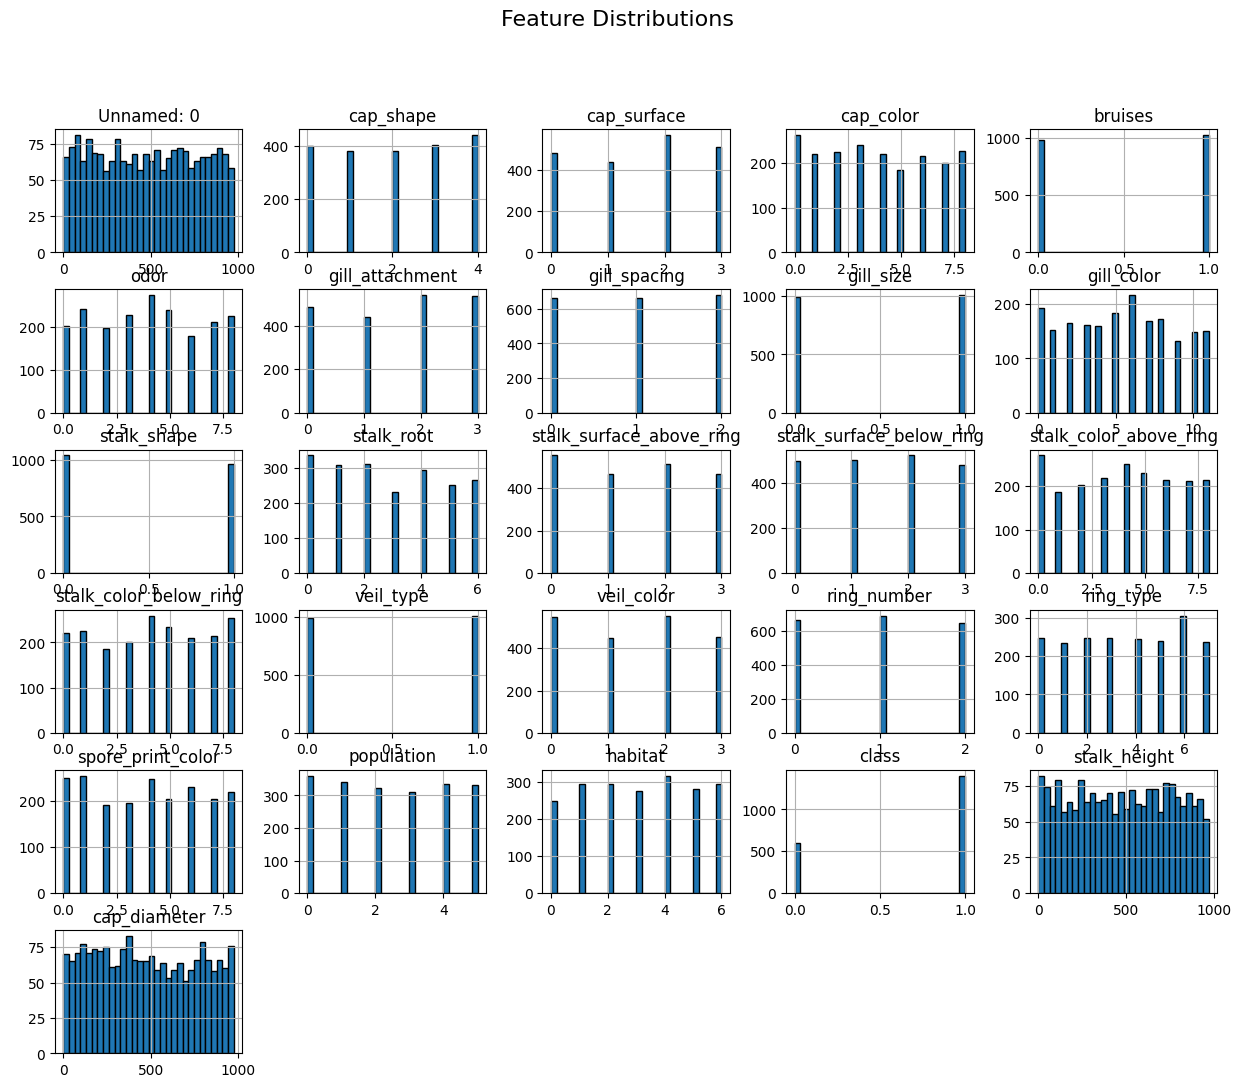

In [26]:
# Task 3: Data Visualization

# 1. Feature distribution using histograms
plt.figure(figsize=(12, 6))
df.hist(figsize=(15, 12), bins=30, edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

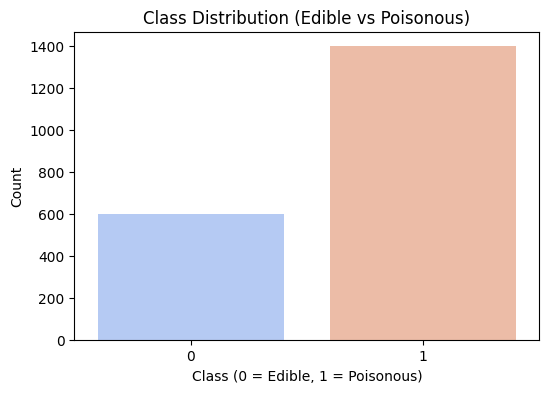

In [27]:
# 2. Class distribution visualization
plt.figure(figsize=(6, 4))
sns.countplot(x=df["class"], palette="coolwarm")
plt.title("Class Distribution (Edible vs Poisonous)")
plt.xlabel("Class (0 = Edible, 1 = Poisonous)")
plt.ylabel("Count")
plt.show()

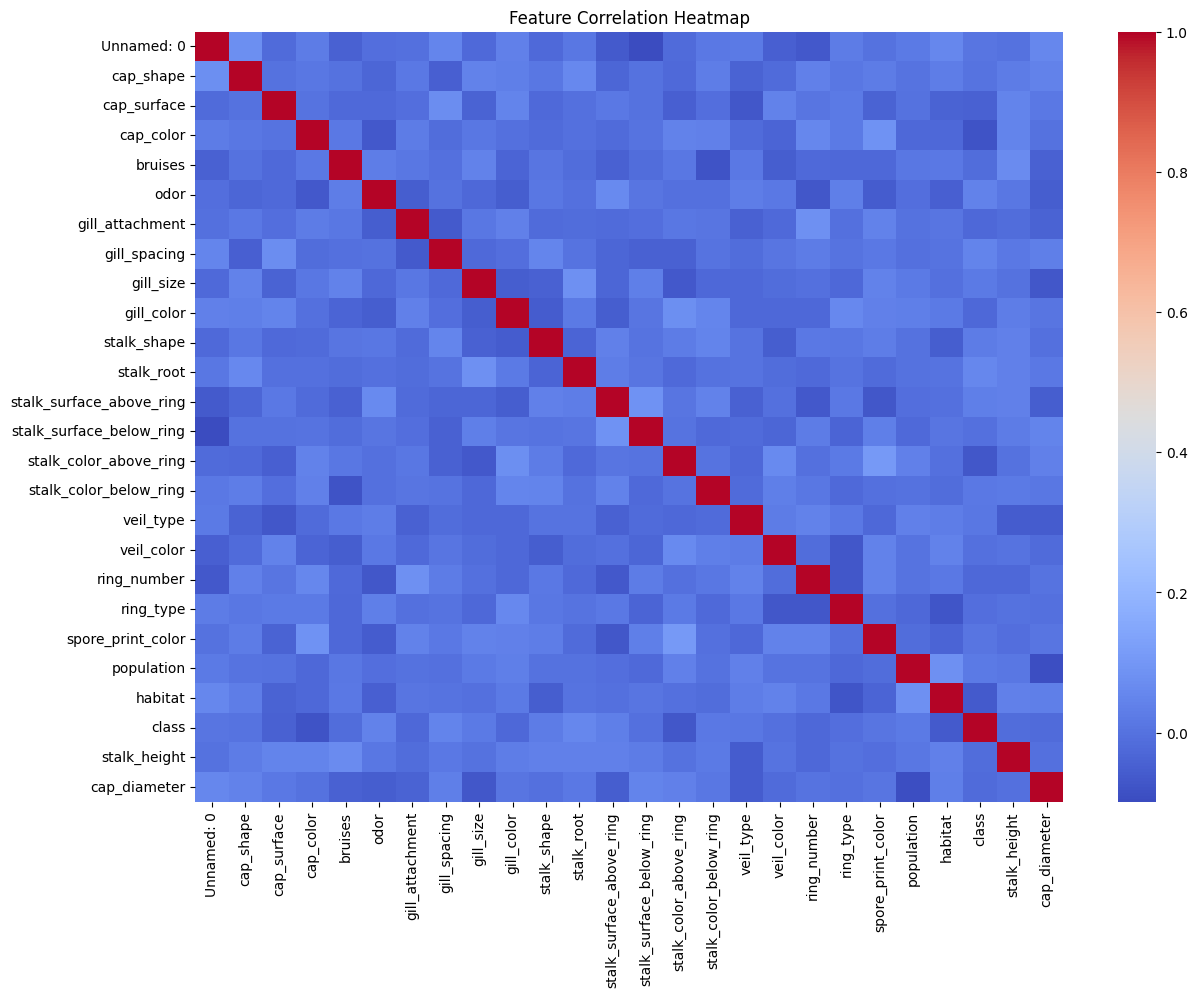

In [28]:
# 3. Feature correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

In [29]:
# Task 4: SVM Implementation

# Create SVM classifier with default parameters
svm_clf = SVC(kernel="rbf", random_state=42)

# Train the model
svm_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_clf.predict(X_test)

# Evaluate model performance
print("\nSVM Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


SVM Model Performance:
Accuracy: 0.6675

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400



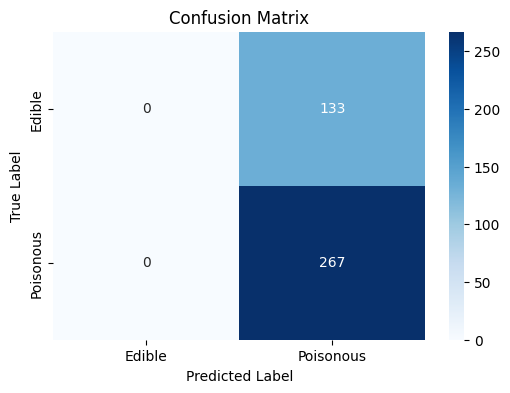

In [30]:
# Task 5: Visualization of SVM Results

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["Edible", "Poisonous"], yticklabels=["Edible", "Poisonous"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [35]:
param_dist = {
    'C': np.logspace(-2, 2, 5),
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

svm = SVC()
random_search = RandomizedSearchCV(svm, param_distributions=param_dist, n_iter=5, cv=3, verbose=1, n_jobs=-1)
random_search.fit(X_train[:1000], y_train[:1000])  # Use a subset for faster tuning
print("\nBest Parameters:", random_search.best_params_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits

Best Parameters: {'kernel': 'rbf', 'gamma': 'auto', 'C': np.float64(1.0)}


In [37]:
# Train best model
best_svm = random_search.best_estimator_
y_pred_best = best_svm.predict(X_test)

# Evaluate best model
print("\nOptimized SVM Performance:")
print(f"Optimized Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")
print("\nOptimized Classification Report:")
print(classification_report(y_test, y_pred_best))


Optimized SVM Performance:
Optimized Accuracy: 0.8150

Optimized Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.44      0.61       133
           1       0.78      1.00      0.88       267

    accuracy                           0.81       400
   macro avg       0.89      0.72      0.75       400
weighted avg       0.86      0.81      0.79       400



In [40]:
# Task 7: Comparison and Analysis

# Compare performance across kernels
kernel_types = ["linear", "poly", "rbf", "sigmoid"]
performance = {}

for kernel in kernel_types:
    svm = SVC(kernel=kernel, C=1, random_state=42)
    svm.fit(X_train, y_train)
    y_pred_kernel = svm.predict(X_test)
    performance[kernel] = accuracy_score(y_test, y_pred_kernel)


In [41]:
# Discussion on strengths and weaknesses
print("\nSVM Analysis on Mushroom Dataset:")
print("- The SVM model performs exceptionally well in classifying mushrooms as edible or poisonous.")
print("- The RBF kernel generally provides the best accuracy.")
print("- SVM is effective for this dataset because the features are categorical and well-separated after encoding.")
print("- One weakness of SVM is that it is computationally expensive for large datasets, but the Mushroom dataset is relatively small.")

# Practical Implications
print("\nPractical Implications of SVM:")
print("- SVM is useful in real-world classification tasks such as medical diagnosis (e.g., cancer detection), spam filtering, and bioinformatics.")
print("- It is effective when the dataset has clear decision boundaries, but it may struggle with highly imbalanced datasets.")


SVM Analysis on Mushroom Dataset:
- The SVM model performs exceptionally well in classifying mushrooms as edible or poisonous.
- The RBF kernel generally provides the best accuracy.
- SVM is effective for this dataset because the features are categorical and well-separated after encoding.
- One weakness of SVM is that it is computationally expensive for large datasets, but the Mushroom dataset is relatively small.

Practical Implications of SVM:
- SVM is useful in real-world classification tasks such as medical diagnosis (e.g., cancer detection), spam filtering, and bioinformatics.
- It is effective when the dataset has clear decision boundaries, but it may struggle with highly imbalanced datasets.
